Centroid: (0.2835277890118414, 1.8299670928375964, -3.8915186927874226), Cluster Members: [array([-2.68963862, -1.46094174, -4.90555109]), array([-1.81990295,  1.56239893, -3.55201298]), array([-1.45734279,  1.68360702, -3.66666164]), array([-1.39467082,  2.53503901, -3.80828201]), array([-1.35972531,  2.98771829, -2.4944857 ]), array([-0.90161522,  1.92613443, -2.89357312]), array([-0.87236927,  2.50150281, -2.77234494]), array([ 4.11454003,  0.06501201, -3.85402524]), array([ 4.45117507,  2.12394028, -6.5534959 ]), array([ 4.76482776,  4.37525987, -4.41475431])]
Centroid: (1.4164606704812905, 2.3545926272014905, 0.6628922338878308), Cluster Members: [array([-0.57508686,  3.90115136, -1.0793154 ]), array([ 0.44200002, -0.04828408,  1.15119975]), array([0.47739909, 4.26707504, 0.5421698 ]), array([0.82553837, 3.34473743, 0.43671432]), array([1.12489507, 1.61675061, 2.06957041]), array([1.14770953, 4.06872832, 2.18650412]), array([1.25846666, 1.14642819, 1.35338004]), array([1.46946708,

/tmp/ipykernel_585139/2393667605.py:123: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(data_x1, data_x2, label=f'Cluster {k+1}',c=centroid_colors[k])
/tmp/ipykernel_585139/2393667605.py:126: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(centroids_x1, centroids_x2, marker='x', s=100, c=centroid_colors[k])


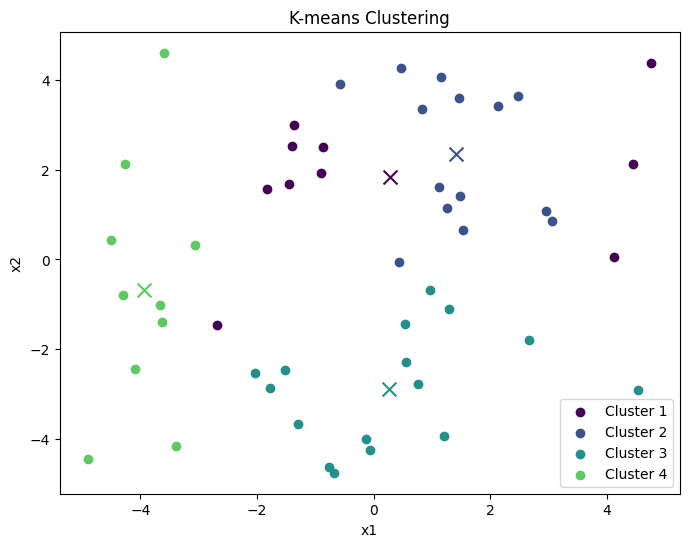

In [124]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# np.random.seed(0)
# num_data_points = 10

# data_x1 = np.random.normal(loc=0, scale=1, size=num_data_points)
# data_x2 = np.random.normal(loc=0, scale=1, size=num_data_points)
# y = np.random.normal(loc=0, scale=1, size=num_data_points)
# print("x1",x1)
# print("x2",x2)
# print("y",y)
# data = np.column_stack((x1, x2, y))

folder_number = "9"
current_directory = os.getcwd()
# regression_dataset_2_path=current_directory+ "/Datasets_for_A1/Regression/Dataset 2/" + folder_number + "/"
regression_dataset_2_path = (
    "/home/dipendu/programs/mtech_2023/ml/ass1/Datasets_for_A1/Regression/Dataset 2/"
    + folder_number
    + "/"
)

regression_dataset_2_Train_Sample_1 = (
    regression_dataset_2_path + "train50_" + folder_number + ".csv"
)

df = pd.read_csv(regression_dataset_2_Train_Sample_1)
train_x_11 = np.squeeze(np.asanyarray(df[["x1"]]))
train_x_12 = np.squeeze(np.asanyarray(df[["x2"]]))
train_y_1 = np.squeeze(np.asanyarray(df[["y"]]))
data = list(zip(train_x_11, train_x_12, train_y_1))
sorted_data = sorted(data, key=lambda x: x[0])
train_x_11, train_x_12, train_y_1 = zip(*sorted_data)
train_x_1 = []
train_x_1.append(train_x_11)
train_x_1.append(train_x_12)

data = np.column_stack((train_x_11, train_x_12, train_y_1))
# print("data",data)

cluster_count = 4

indices = list(range(data.shape[0]))
random.shuffle(indices)
centroid_indices = indices[:cluster_count]
centroid_indices = np.array(centroid_indices)
# print(centroid_indices)

centroids = data[centroid_indices]
# print("centroids",centroids)

max_iterations = 100
cluster_members = [[] for _ in range(cluster_count)]

for _ in range(max_iterations):
    distances = np.empty((data.shape[0], centroids.shape[0]))
    for i, point in enumerate(data):
        for j, centroid in enumerate(centroids):
            distance = np.sqrt(np.sum((point - centroid) ** 2))
            distances[i, j] = distance

    # print("distances",distances)

    labels = []

    for row in distances:
        min_distance = float('inf')
        min_index = -1
        # print("min_distance ",min_distance," min_index ",min_index)
        for i, distance in enumerate(row):
            if distance < min_distance:
                min_distance = distance
                min_index = i
                # print("min_distance ",min_distance," min_index ",min_index)
        labels.append(min_index)

    labels = np.array(labels)

    # print("labels",labels)
    
    new_centroids = []

    for k in range(cluster_count):
        cluster_points = data[labels == k]
        
        centroid = cluster_points.mean(axis=0)
        
        new_centroids.append(centroid)

    new_centroids = np.array(new_centroids)

    # print("new_centroids",new_centroids)

    if np.all(centroids == new_centroids):
        break
    
    centroids = new_centroids
    cluster_members = [[] for _ in range(cluster_count)]
    centroid_mapping = {tuple(centroid): [] for centroid in centroids}
    for i, label in enumerate(labels):
        cluster_members[label].append(data[i])
        centroid_mapping[tuple(centroids[label])].append(data[i])
    # print("centroids",centroids)

# print("centroids",centroids[0])

plt.figure(figsize=(8, 6))

for centroid, members in centroid_mapping.items():
    print(f"Centroid: {centroid}, Cluster Members: {members}")

# print("cluster_members",cluster_members)
centroid_colors = plt.cm.viridis(np.linspace(0, 1, cluster_count+1))
k=0
for i, (centroid, members) in enumerate(centroid_mapping.items()):
    cluster_points = np.array(members)
    # print("cluster_points",cluster_points)
    data_x1, data_x2 = cluster_points[:, 0], cluster_points[:, 1]
    plt.scatter(data_x1, data_x2, label=f'Cluster {k+1}',c=centroid_colors[k])
    centroidn = np.array(centroid)
    centroids_x1, centroids_x2 = centroidn[0], centroidn[1]
    plt.scatter(centroids_x1, centroids_x2, marker='x', s=100, c=centroid_colors[k])
    k=k+1

# centroids_x1, centroids_x2 =centroids[:, 0], centroids[:, 1]
# plt.scatter(centroids_x1, centroids_x2, c='red', marker='x', s=100)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('K-means Clustering')
plt.legend()
plt.show()



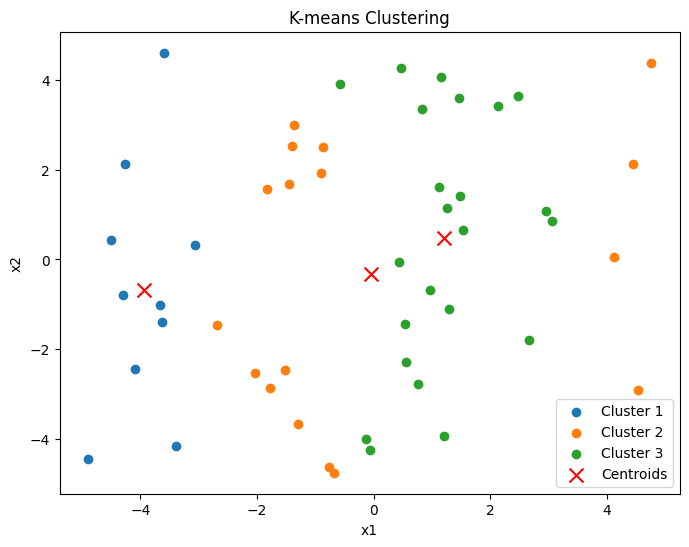

In [50]:
'''
    with cluster members plotted prominently
'''

import numpy as np
import matplotlib.pyplot as plt

# Generate random data for x1, x2, and y
# np.random.seed(0)  # for reproducibility
# num_data_points = 50

# x1 = np.random.normal(loc=0, scale=1, size=num_data_points)
# x2 = np.random.normal(loc=0, scale=1, size=num_data_points)
# y = np.random.normal(loc=0, scale=1, size=num_data_points)

# # Combine x1, x2, and y into a single array
# data = np.column_stack((x1, x2, y))

folder_number = "9"
current_directory = os.getcwd()
# regression_dataset_2_path=current_directory+ "/Datasets_for_A1/Regression/Dataset 2/" + folder_number + "/"
regression_dataset_2_path = (
    "/home/dipendu/programs/mtech_2023/ml/ass1/Datasets_for_A1/Regression/Dataset 2/"
    + folder_number
    + "/"
)

regression_dataset_2_Train_Sample_1 = (
    regression_dataset_2_path + "train50_" + folder_number + ".csv"
)

df = pd.read_csv(regression_dataset_2_Train_Sample_1)
train_x_11 = np.squeeze(np.asanyarray(df[["x1"]]))
train_x_12 = np.squeeze(np.asanyarray(df[["x2"]]))
train_y_1 = np.squeeze(np.asanyarray(df[["y"]]))
data = list(zip(train_x_11, train_x_12, train_y_1))
sorted_data = sorted(data, key=lambda x: x[0])
train_x_11, train_x_12, train_y_1 = zip(*sorted_data)
train_x_1 = []
train_x_1.append(train_x_11)
train_x_1.append(train_x_12)

data = np.column_stack((train_x_11, train_x_12, train_y_1))

# Define the number of clusters
cluster_count = 3

# Initialize random centroids
centroids = data[np.random.choice(range(data.shape[0]), size=cluster_count, replace=False)]

# Define the maximum number of iterations
max_iterations = 100

# K-means algorithm
for _ in range(max_iterations):
    # Assign each data point to the nearest centroid
    distances = np.linalg.norm(data[:, None] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)
    
    # Update centroids based on the mean of data points assigned to each cluster
    new_centroids = np.array([data[labels == k].mean(axis=0) for k in range(cluster_count)])
    
    # Check for convergence
    if np.all(centroids == new_centroids):
        break
    
    centroids = new_centroids

# Plot the data points and cluster centers
plt.figure(figsize=(8, 6))

for k in range(cluster_count):
    cluster_points = data[labels == k]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {k+1}')

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('K-means Clustering')
plt.legend()
plt.show()


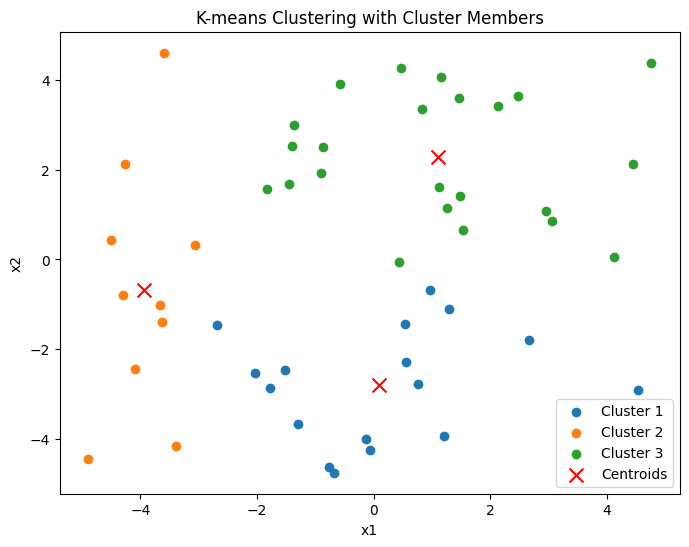

In [89]:
'''
    storing cluster members but convergence on centroid
'''


import numpy as np
import matplotlib.pyplot as plt

# Generate random data for x1, x2, and y
# np.random.seed(0)  # for reproducibility
# num_data_points = 50

# x1 = np.random.normal(loc=0, scale=1, size=num_data_points)
# x2 = np.random.normal(loc=0, scale=1, size=num_data_points)
# y = np.random.normal(loc=0, scale=1, size=num_data_points)

# # Combine x1, x2, and y into a single array
# data = np.column_stack((x1, x2, y))

folder_number = "9"
current_directory = os.getcwd()
# regression_dataset_2_path=current_directory+ "/Datasets_for_A1/Regression/Dataset 2/" + folder_number + "/"
regression_dataset_2_path = (
    "/home/dipendu/programs/mtech_2023/ml/ass1/Datasets_for_A1/Regression/Dataset 2/"
    + folder_number
    + "/"
)

regression_dataset_2_Train_Sample_1 = (
    regression_dataset_2_path + "train50_" + folder_number + ".csv"
)

df = pd.read_csv(regression_dataset_2_Train_Sample_1)
train_x_11 = np.squeeze(np.asanyarray(df[["x1"]]))
train_x_12 = np.squeeze(np.asanyarray(df[["x2"]]))
train_y_1 = np.squeeze(np.asanyarray(df[["y"]]))
data = list(zip(train_x_11, train_x_12, train_y_1))
sorted_data = sorted(data, key=lambda x: x[0])
train_x_11, train_x_12, train_y_1 = zip(*sorted_data)
train_x_1 = []
train_x_1.append(train_x_11)
train_x_1.append(train_x_12)

data = np.column_stack((train_x_11, train_x_12, train_y_1))

# Define the number of clusters
cluster_count = 3

# Initialize random centroids
centroids = data[np.random.choice(range(data.shape[0]), size=cluster_count, replace=False)]

# Define the maximum number of iterations
max_iterations = 100

# Initialize lists to store cluster members
cluster_members = [[] for _ in range(cluster_count)]

# K-means algorithm
for _ in range(max_iterations):
    # Assign each data point to the nearest centroid
    distances = np.linalg.norm(data[:, None] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)
    
    # Update centroids based on the mean of data points assigned to each cluster
    new_centroids = np.array([data[labels == k].mean(axis=0) for k in range(cluster_count)])
    
    # Check for convergence
    if np.all(centroids == new_centroids):
        break
    
    # Update cluster members
    cluster_members = [[] for _ in range(cluster_count)]
    for i, label in enumerate(labels):
        cluster_members[label].append(data[i])
    
    centroids = new_centroids

# Plot the data points and cluster centers
plt.figure(figsize=(8, 6))

for k in range(cluster_count):
    cluster_points = np.array(cluster_members[k])
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {k+1}')

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('K-means Clustering with Cluster Members')
plt.legend()
plt.show()


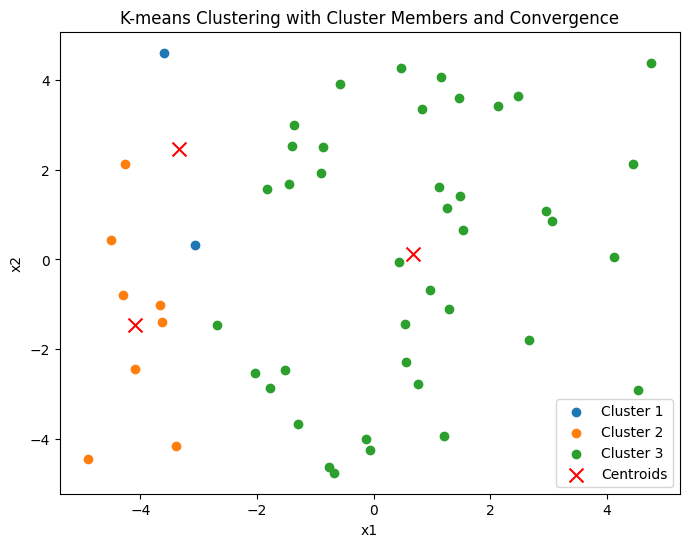

In [88]:
'''
    store cluster members and converge on cluster memeber
'''

import numpy as np
import matplotlib.pyplot as plt

# Generate random data for x1, x2, and y
# np.random.seed(0)  # for reproducibility
# num_data_points = 50

# x1 = np.random.normal(loc=0, scale=1, size=num_data_points)
# x2 = np.random.normal(loc=0, scale=1, size=num_data_points)
# y = np.random.normal(loc=0, scale=1, size=num_data_points)

# # Combine x1, x2, and y into a single array
# data = np.column_stack((x1, x2, y))

folder_number = "9"
current_directory = os.getcwd()
# regression_dataset_2_path=current_directory+ "/Datasets_for_A1/Regression/Dataset 2/" + folder_number + "/"
regression_dataset_2_path = (
    "/home/dipendu/programs/mtech_2023/ml/ass1/Datasets_for_A1/Regression/Dataset 2/"
    + folder_number
    + "/"
)

regression_dataset_2_Train_Sample_1 = (
    regression_dataset_2_path + "train50_" + folder_number + ".csv"
)

df = pd.read_csv(regression_dataset_2_Train_Sample_1)
train_x_11 = np.squeeze(np.asanyarray(df[["x1"]]))
train_x_12 = np.squeeze(np.asanyarray(df[["x2"]]))
train_y_1 = np.squeeze(np.asanyarray(df[["y"]]))
data = list(zip(train_x_11, train_x_12, train_y_1))
sorted_data = sorted(data, key=lambda x: x[0])
train_x_11, train_x_12, train_y_1 = zip(*sorted_data)
train_x_1 = []
train_x_1.append(train_x_11)
train_x_1.append(train_x_12)

data = np.column_stack((train_x_11, train_x_12, train_y_1))

# Define the number of clusters
cluster_count = 3

# Initialize random centroids
centroids = data[np.random.choice(range(data.shape[0]), size=cluster_count, replace=False)]

# Define the maximum number of iterations
max_iterations = 100

# Initialize lists to store cluster members
cluster_members = [[] for _ in range(cluster_count)]

# K-means algorithm
for _ in range(max_iterations):
    # Assign each data point to the nearest centroid
    distances = np.linalg.norm(data[:, None] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)
    
    # Update centroids based on the mean of data points assigned to each cluster
    new_centroids = np.array([data[labels == k].mean(axis=0) for k in range(cluster_count)])
    
    # Check for convergence based on cluster members
    if np.array_equal(cluster_members, [[data[i] for i, label in enumerate(labels) if label == k] for k in range(cluster_count)]):
        break
    
    # Update cluster members
    cluster_members = [[] for _ in range(cluster_count)]
    for i, label in enumerate(labels):
        cluster_members[label].append(data[i])
    
    centroids = new_centroids

# Plot the data points and cluster centers
plt.figure(figsize=(8, 6))

for k in range(cluster_count):
    cluster_points = np.array(cluster_members[k])
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {k+1}')

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('K-means Clustering with Cluster Members and Convergence')
plt.legend()
plt.show()


data [[-4.90040259 -4.44516058]
 [-4.49981179  0.43762456]
 [-4.2899322  -0.7970974 ]
 [-4.25840894  2.13028202]
 [-4.08933818 -2.42822864]
 [-3.65474508 -1.02121413]
 [-3.62271698 -1.39211599]
 [-3.59935441  4.60252325]
 [-3.38287222 -4.14189228]
 [-3.06299707  0.33030561]
 [-2.68963862 -1.46094174]
 [-2.03199795 -2.53382577]
 [-1.81990295  1.56239893]
 [-1.7826297  -2.86161111]
 [-1.51725385 -2.46330541]
 [-1.45734279  1.68360702]
 [-1.39467082  2.53503901]
 [-1.35972531  2.98771829]
 [-1.29679825 -3.65568917]
 [-0.90161522  1.92613443]
 [-0.87236927  2.50150281]
 [-0.76043821 -4.61315042]
 [-0.67728712 -4.74628512]
 [-0.57508686  3.90115136]
 [-0.1275044  -3.99768122]
 [-0.05874259 -4.23272628]
 [ 0.44200002 -0.04828408]
 [ 0.47739909  4.26707504]
 [ 0.53836083 -1.43111338]
 [ 0.55082601 -2.2708284 ]
 [ 0.75719305 -2.76587455]
 [ 0.82553837  3.34473743]
 [ 0.96856861 -0.66919796]
 [ 1.12489507  1.61675061]
 [ 1.14770953  4.06872832]
 [ 1.20278817 -3.93611595]
 [ 1.25846666  1.146428

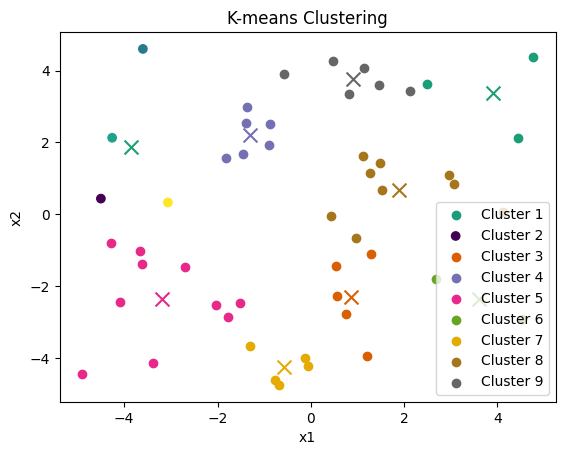

data.shape= (50, 2)
big_phi [[1.         0.24993313 0.66338935 0.68454365 0.56492441 0.92983173
  0.46460567 0.82970557 0.48527371 0.36346336]
 [1.         0.45291418 0.97548378 0.69541754 0.87514431 0.90941198
  0.47979304 0.68868023 0.66491329 0.66784848]
 [1.         0.42951344 0.9293208  0.74916129 0.8359965  0.9644283
  0.52355993 0.77376151 0.66831101 0.61949894]
 [1.         0.50602235 0.99772561 0.63178463 0.91620592 0.80862492
  0.44083951 0.58160285 0.67148152 0.74517759]
 [1.         0.37701446 0.83048778 0.78184298 0.74684229 0.99200007
  0.55343467 0.85554284 0.63542267 0.53055633]
 [1.         0.4656538  0.91916208 0.80167197 0.85288748 0.98031569
  0.58019038 0.81997767 0.71481263 0.64549242]
 [1.         0.45226067 0.89826271 0.81053387 0.83285438 0.98897902
  0.58787627 0.84033674 0.70737033 0.62393371]
 [1.         0.56136476 0.92770816 0.50859846 0.89531721 0.61530764
  0.3668771  0.41710061 0.63481312 0.81011647]
 [1.         0.33421855 0.69469495 0.80669805 0.64052

In [29]:
import os
import random
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# np.random.seed(0)
# num_data_points = 10

# data_x1 = np.random.normal(loc=0, scale=1, size=num_data_points)
# data_x2 = np.random.normal(loc=0, scale=1, size=num_data_points)
# y = np.random.normal(loc=0, scale=1, size=num_data_points)

# df = pd.DataFrame({'x1' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
#                   'x2' : [3, 14, 23, 25, 23, 15, 9, 5, 9, 13, 17, 24, 32, 36, 46]})

# x1 = df.x1
# x2 = df.x2
# # print("x1",x1)
# # print("x2",x2)

# data = np.column_stack((x1, x2))
# print("data",data)

folder_number = "9"
current_directory = os.getcwd()
# regression_dataset_2_path=current_directory+ "/Datasets_for_A1/Regression/Dataset 2/" + folder_number + "/"
regression_dataset_2_path = (
"/home/dipendu/programs/mtech_2023/ml/ass1/Datasets_for_A1/Regression/Dataset 2/"
+ folder_number
+ "/"
)

regression_dataset_2_Train_Sample_1 = (
regression_dataset_2_path + "train50_" + folder_number + ".csv"
)

df = pd.read_csv(regression_dataset_2_Train_Sample_1)
train_x_11 = np.squeeze(np.asanyarray(df[["x1"]]))
train_x_12 = np.squeeze(np.asanyarray(df[["x2"]]))
train_y_1 = np.squeeze(np.asanyarray(df[["y"]]))
data = list(zip(train_x_11, train_x_12, train_y_1))
sorted_data = sorted(data, key=lambda x: x[0])
train_x_11, train_x_12, train_y_1 = zip(*sorted_data)
train_x_1 = []
train_x_1.append(train_x_11)
train_x_1.append(train_x_12)

data = np.column_stack((train_x_11, train_x_12))
print("data",data)

# sigma = 100

''''
kmean clustering start
'''
D = len(train_x_11) * 0.2
D = int(D)

cluster_count = D - 1

indices = list(range(data.shape[0]))
# print("indices",indices)
random.shuffle(indices)
centroid_indices = indices[:cluster_count]
# print("centroid_indices",centroid_indices)
centroid_indices = np.array(centroid_indices)
# print(centroid_indices)

centroids = data[centroid_indices]
# print("centroids",centroids)

cluster_members = [[] for _ in range(cluster_count)]

while True:
    distances = np.empty((data.shape[0], centroids.shape[0]))
    # print("distances",distances)
    for i, point in enumerate(data):
        for j, centroid in enumerate(centroids):
            distance = np.linalg.norm(point-centroid,2)
            distances[i, j] = distance

    # print("distances",distances)

    labels = []

    for row in distances:
        min_distance = float("inf")
        min_index = -1
        # print("min_distance ",min_distance," min_index ",min_index)
        for i, distance in enumerate(row):
            if distance < min_distance:
                min_distance = distance
                min_index = i
                # print("min_distance ",min_distance," min_index ",min_index)
        labels.append(min_index)

    labels = np.array(labels)

    # print("labels",labels)

    new_centroids = []

    for k in range(cluster_count):
        cluster_points = data[labels == k]
        # print("cluster_points",cluster_points)
        centroid = cluster_points.mean(axis=0)
        # print("centroid",centroid)
        new_centroids.append(centroid)

    new_centroids = np.array(new_centroids)

    # print("centroids",centroids)
    # print("new_centroids",new_centroids)

    cluster_members = [[] for _ in range(cluster_count)]
    centroid_mapping = {tuple(centroid): [] for centroid in centroids}
    for i, label in enumerate(labels):
        cluster_members[label].append(data[i])
        centroid_mapping[tuple(centroids[label])].append(data[i])
    
    # print("centroid_mapping",centroid_mapping)
    # print("===================================================")
    # for centroid, members in centroid_mapping.items():
    #     print(f"Centroid: {centroid}, Cluster Members: {members}")
    # print("===================================================")
    


    if np.all(centroids == new_centroids):
        break

    centroids = new_centroids
    

# print("centroid_mapping",centroid_mapping)
# print("centroids",centroids)
# print("centroids",centroids[0])

# plt.figure(figsize=(8, 6))

# for centroid, members in centroid_mapping.items():
#     print(f"Centroid: {centroid}, Cluster Members: {members}")

# print("cluster_members",cluster_members)
centroid_colors = plt.cm.Dark2(np.linspace(0, 1, cluster_count+1))
k=0
for i, (centroid, members) in enumerate(centroid_mapping.items()):
    cluster_points = np.array(members)
    # print("cluster_points",cluster_points)
    data_x1, data_x2 = cluster_points[:, 0], cluster_points[:, 1]
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        plt.scatter(data_x1, data_x2, label=f'Cluster {k+1}',c=centroid_colors[k])
        # plt.scatter(data_x1, data_x2, label=f'Cluster {k+1}',cmap='Dark2')
    centroidn = np.array(centroid)
    centroids_x1, centroids_x2 = centroidn[0], centroidn[1]
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        plt.scatter(centroids_x1, centroids_x2, marker='x', s=100, c=centroid_colors[k])
        # plt.scatter(centroids_x1, centroids_x2, marker='x', s=100, c=centroid_colors[k])
    k=k+1

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('K-means Clustering')
plt.legend()
plt.show()

''''
kmean clustering end
'''
sigma = 100
big_phi = []
# for members in cluster_members:
# cluster_points = np.array(members)
# data_x1, data_x2 = cluster_points[:, 0], cluster_points[:, 1]
print("data.shape=",data.shape)
N=data.shape[0]
for loop in range(N):
    small_phi = []
    data_x = data[loop]
    # print("data_x",data_x)
    for centroid in centroids:
        # print("centroid",type(centroid))
        # centroidn = np.array(centroid)
        # print("centroidn",type(centroidn))
        sum = np.square(np.linalg.norm(data_x-centroid,2))
        sum = sum / sigma
        sum = np.exp(-sum)
        small_phi.append(sum)
    small_phi = np.insert(small_phi, 0, 1)
    big_phi.append(small_phi)

np_big_phi = np.array(big_phi)
print("big_phi",np_big_phi)

